In [4]:
# installing and loading the necessary packages
install.packages("rpart.plot")
install.packages("rattle")
install.packages("DT")
install.packages ("rlang")

library(datasets)  
library(caTools) 
library(party) 
library(dplyr) 
library(magrittr)
library(rpart.plot)
library(rattle.data)
library(lubridate)
library(DT)
library(scales)
library(tidyverse)
library(knitr)
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: rpart

Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect,

In [5]:
# loading csvs
uber <- read.csv("uber-raw-data-sep14.csv", header= T) 

Lyft <-read.csv("other-Lyft_B02510.csv", header= T)

In [6]:
head(uber)

Date.Time,Lat,Lon,Base
9/1/2014 0:01:00,40.2201,-74.0021,B02512
9/1/2014 0:01:00,40.7500,-74.0027,B02512
9/1/2014 0:03:00,40.7559,-73.9864,B02512
9/1/2014 0:06:00,40.7450,-73.9889,B02512
9/1/2014 0:11:00,40.8145,-73.9444,B02512
9/1/2014 0:12:00,40.6735,-73.9918,B02512


In [7]:
head(Lyft)

time_of_trip,start_lat,start_lng,X
9/4/2014 9:51,40.64705,-73.77988,
8/27/2014 21:13,40.74916,-73.98373,
9/4/2014 14:16,40.64065,-73.97594,
9/4/2014 16:08,40.75002,-73.99514,
8/28/2014 2:41,40.76715,-73.98636,
9/13/2014 3:57,40.70707,-74.01211,


In [8]:
# dropping the base number column in uber
uber = subset(uber, select = c(1:3))
head(uber)

Date.Time,Lat,Lon
9/1/2014 0:01:00,40.2201,-74.0021
9/1/2014 0:01:00,40.7500,-74.0027
9/1/2014 0:03:00,40.7559,-73.9864
9/1/2014 0:06:00,40.7450,-73.9889
9/1/2014 0:11:00,40.8145,-73.9444
9/1/2014 0:12:00,40.6735,-73.9918


In [9]:
# dropping the empty column in Lyft
Lyft = subset(Lyft, select = c(1:3))
head(Lyft)

time_of_trip,start_lat,start_lng
9/4/2014 9:51,40.64705,-73.77988
8/27/2014 21:13,40.74916,-73.98373
9/4/2014 14:16,40.64065,-73.97594
9/4/2014 16:08,40.75002,-73.99514
8/28/2014 2:41,40.76715,-73.98636
9/13/2014 3:57,40.70707,-74.01211


In [10]:
# add in a variable for prediction and rename Lyft column names to match with uber's
uber$Takeuber <- ("Yes")

Lyft$Takeuber <- ("No")

Lyft <- rename(Lyft, Date.Time=time_of_trip,Lat=start_lat, Lon=start_lng)

head(Lyft)

Date.Time,Lat,Lon,Takeuber
9/4/2014 9:51,40.64705,-73.77988,No
8/27/2014 21:13,40.74916,-73.98373,No
9/4/2014 14:16,40.64065,-73.97594,No
9/4/2014 16:08,40.75002,-73.99514,No
8/28/2014 2:41,40.76715,-73.98636,No
9/13/2014 3:57,40.70707,-74.01211,No


In [11]:
# Changing format of Date.Time of uber
uber$Date.Time <- strptime(uber$Date.Time, format = "%m/%d/%Y %H:%M:%S") 

# New columns are generated/extracted
uber$Day <- as.integer(format(uber$Date.Time, "%d"))

uber$Week_day <- as.integer(format(uber$Date.Time, "%w"))

uber$Time_hour <- as.integer(format(uber$Date.Time, "%H"))

uber$Time_minute <- as.integer(format(uber$Date.Time, "%M"))

uber$month <- factor(month(uber$Date.Time, label = TRUE)) 

uber$Particular_Day <- factor(wday(uber$Date.Time, label = TRUE))

head(uber)

Date.Time,Lat,Lon,Takeuber,Day,Week_day,Time_hour,Time_minute,month,Particular_Day
2014-09-01 00:01:00,40.2201,-74.0021,Yes,1,1,0,1,Sep,Mon
2014-09-01 00:01:00,40.7500,-74.0027,Yes,1,1,0,1,Sep,Mon
2014-09-01 00:03:00,40.7559,-73.9864,Yes,1,1,0,3,Sep,Mon
2014-09-01 00:06:00,40.7450,-73.9889,Yes,1,1,0,6,Sep,Mon
2014-09-01 00:11:00,40.8145,-73.9444,Yes,1,1,0,11,Sep,Mon
2014-09-01 00:12:00,40.6735,-73.9918,Yes,1,1,0,12,Sep,Mon


In [12]:
# Changing format of Date.Time of Lyft
Lyft$Date.Time <- strptime(Lyft$Date.Time, format = "%m/%d/%Y %H:%M") 

# New columns are generated/extracted
Lyft$Day <- as.integer(format(Lyft$Date.Time, "%d"))

Lyft$Week_day <- as.integer(format(Lyft$Date.Time, "%w"))

Lyft$Time_hour <- as.integer(format(Lyft$Date.Time, "%H"))

Lyft$Time_minute <- as.integer(format(Lyft$Date.Time, "%M"))

Lyft$month <- factor(month(Lyft$Date.Time, label = TRUE)) 

Lyft$Particular_Day <- factor(wday(Lyft$Date.Time, label = TRUE))

head(Lyft)

Date.Time,Lat,Lon,Takeuber,Day,Week_day,Time_hour,Time_minute,month,Particular_Day
2014-09-04 09:51:00,40.64705,-73.77988,No,4,4,9,51,Sep,Thu
2014-08-27 21:13:00,40.74916,-73.98373,No,27,3,21,13,Aug,Wed
2014-09-04 14:16:00,40.64065,-73.97594,No,4,4,14,16,Sep,Thu
2014-09-04 16:08:00,40.75002,-73.99514,No,4,4,16,8,Sep,Thu
2014-08-28 02:41:00,40.76715,-73.98636,No,28,4,2,41,Aug,Thu
2014-09-13 03:57:00,40.70707,-74.01211,No,13,6,3,57,Sep,Sat


In [13]:
# subset Lyft dataset to only September data
Lyft = Lyft%>%
        filter(month == 'Sep')

In [14]:
head(Lyft)

Date.Time,Lat,Lon,Takeuber,Day,Week_day,Time_hour,Time_minute,month,Particular_Day
2014-09-04 09:51:00,40.64705,-73.77988,No,4,4,9,51,Sep,Thu
2014-09-04 14:16:00,40.64065,-73.97594,No,4,4,14,16,Sep,Thu
2014-09-04 16:08:00,40.75002,-73.99514,No,4,4,16,8,Sep,Thu
2014-09-13 03:57:00,40.70707,-74.01211,No,13,6,3,57,Sep,Sat
2014-09-11 23:13:00,40.72953,-73.97799,No,11,4,23,13,Sep,Thu
2014-09-10 17:48:00,40.82332,-73.86235,No,10,3,17,48,Sep,Wed


In [70]:
# Combining both uber and Lyft data into one dataset
competition <- rbind(uber, Lyft)

competition$Lat = as.numeric(competition$Lat)
competition$Lon = as.numeric(competition$Lon)
competition$Takeuber = as.factor(competition$Takeuber)
competition$Time_hour = as.factor(competition$Time_hour)

head(competition)
dim(competition)

Date.Time,Lat,Lon,Takeuber,Day,Week_day,Time_hour,Time_minute,month,Particular_Day
2014-09-01 00:01:00,40.2201,-74.0021,Yes,1,1,0,1,Sep,Mon
2014-09-01 00:01:00,40.7500,-74.0027,Yes,1,1,0,1,Sep,Mon
2014-09-01 00:03:00,40.7559,-73.9864,Yes,1,1,0,3,Sep,Mon
2014-09-01 00:06:00,40.7450,-73.9889,Yes,1,1,0,6,Sep,Mon
2014-09-01 00:11:00,40.8145,-73.9444,Yes,1,1,0,11,Sep,Mon
2014-09-01 00:12:00,40.6735,-73.9918,Yes,1,1,0,12,Sep,Mon


[1] 1144135      10

In [71]:
dim(competition)
str(competition)


[1] 1144135      10

'data.frame':	1144135 obs. of  10 variables:
 $ Date.Time     : POSIXlt, format: "2014-09-01 00:01:00" "2014-09-01 00:01:00" ...
 $ Lat           : num  40.2 40.8 40.8 40.7 40.8 ...
 $ Lon           : num  -74 -74 -74 -74 -73.9 ...
 $ Takeuber      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Week_day      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Time_hour     : Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Time_minute   : int  1 1 3 6 11 12 15 16 32 33 ...
 $ month         : Ord.factor w/ 3 levels "Sep"<"Jul"<"Aug": 1 1 1 1 1 1 1 1 1 1 ...
 $ Particular_Day: Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 2 2 2 2 2 2 2 2 2 2 ...



Call:
glm(formula = Takeuber ~ Lat + Lon + Time_hour, family = binomial, 
    data = competition)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7963   0.2996   0.3347   0.4178   1.8781  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -311.96722    4.74457  -65.75   <2e-16 ***
Lat            3.22048    0.07805   41.26   <2e-16 ***
Lon           -2.45738    0.05119  -48.01   <2e-16 ***
Time_hour1    -0.43006    0.01806  -23.81   <2e-16 ***
Time_hour2    -0.82569    0.01895  -43.57   <2e-16 ***
Time_hour3    -0.72451    0.01922  -37.70   <2e-16 ***
Time_hour4    -0.30562    0.01970  -15.51   <2e-16 ***
Time_hour5     0.43540    0.02011   21.65   <2e-16 ***
Time_hour6     1.21330    0.02132   56.90   <2e-16 ***
Time_hour7     1.88429    0.02437   77.31   <2e-16 ***
Time_hour8     2.33817    0.02856   81.86   <2e-16 ***
Time_hour9     2.56268    0.03304   77.57   <2e-16 ***
Time_hour10    2.14276    0.02815   76.13   <2e-16 ***
Ti

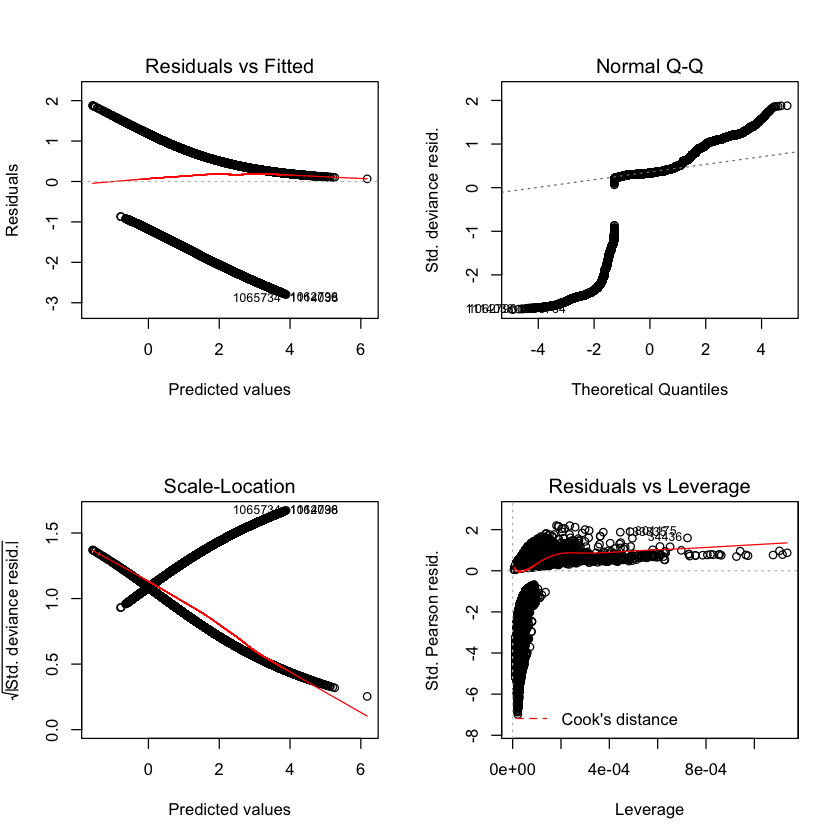

In [89]:
#Fit a logistic regression model that uses Longitude & Latitude to predict whether the consumer will take uber or lyft
par(mfrow=c(2,2))
set.seed(1)
glm.fits=glm(Takeuber~Lat+Lon+Time_hour,data=competition,family=binomial)
summary(glm.fits)
plot(glm.fits)

# Checking model accuracy 


Call:
glm(formula = Takeuber ~ Lat + Lon + Time_hour, family = binomial, 
    data = competition, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7767   0.2990   0.3343   0.4192   1.8813  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -309.96299    6.70357  -46.24   <2e-16 ***
Lat            3.18740    0.10999   28.98   <2e-16 ***
Lon           -2.44876    0.07230  -33.87   <2e-16 ***
Time_hour1    -0.44550    0.02565  -17.37   <2e-16 ***
Time_hour2    -0.84421    0.02689  -31.39   <2e-16 ***
Time_hour3    -0.76198    0.02721  -28.00   <2e-16 ***
Time_hour4    -0.34958    0.02806  -12.46   <2e-16 ***
Time_hour5     0.42011    0.02855   14.72   <2e-16 ***
Time_hour6     1.16776    0.02996   38.98   <2e-16 ***
Time_hour7     1.82303    0.03414   53.40   <2e-16 ***
Time_hour8     2.32674    0.04058   57.34   <2e-16 ***
Time_hour9     2.52972    0.04665   54.23   <2e-16 ***
Time_hour10    2.12423    0.03976   53.42

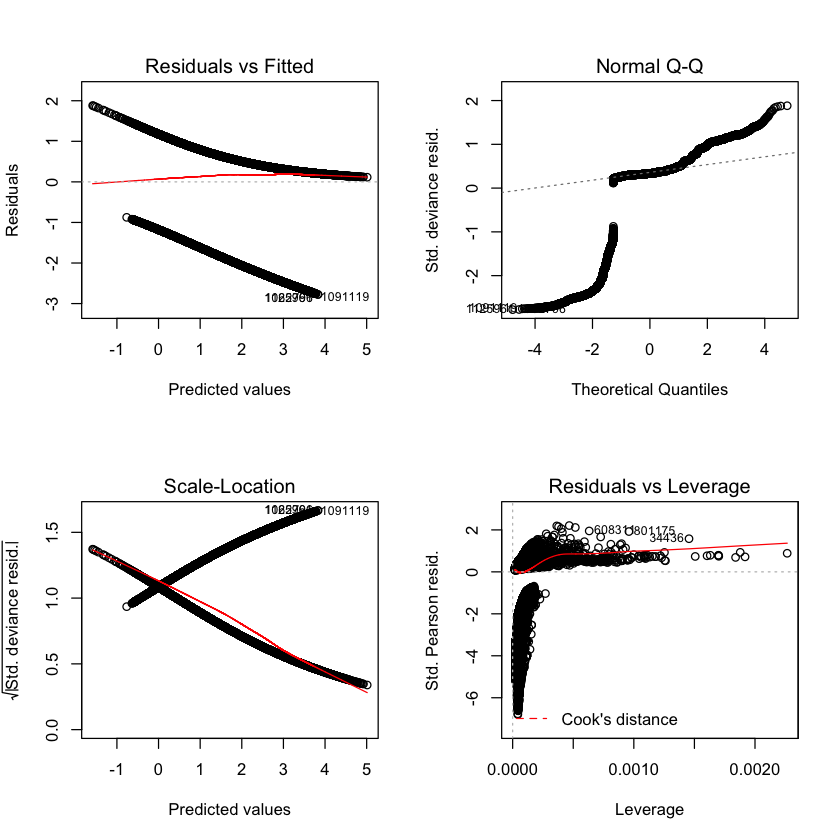

In [90]:
# Fit a multiple logistic regression model using only the training observations.
#Using the validation set approach, estimate the test error of this model.

# Splitting training and testing set
par(mfrow=c(2,2))
train=sample(dim(competition)[1], dim(competition)[1] / 2)
glm.fits1=glm(Takeuber~Lat+Lon+Time_hour,data=competition,family=binomial,subset=train)
summary(glm.fits1)
plot(glm.fits1)


In [91]:
#obtain a prediction of taking uber by calculating the conditional posterior probablity. If greater than 0.5 than take uber

probs <- predict(glm.fits1, newdata = competition[-train, ], type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"

# check how many 'Yes' and 'No'
result = table(pred.glm)
result

#from our results, more consumers perfer to take uber than lyft based on location and time. 
# We believe it is more convenient it is more convenient for the consumers to take Uber. 

pred.glm
    No    Yes 
  2580 569488 

In [92]:
mean(pred.glm != competition[-train, ]$Takeuber) 

#we have a 1% test error rate with the validation set approach 

[1] 0.1014914

# Testing 3 more times 


In [76]:
set.seed(1)

train <- sample(dim(competition)[1], dim(competition)[1] / 2)
fit.glm <- glm(Takeuber~Lat+Lon+Time_hour, data = competition, family = "binomial", subset = train)
probs <- predict(glm.fits1, newdata = competition[-train, ], type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
mean(pred.glm != competition[-train, ]$Takeuber)

train <- sample(dim(competition)[1], dim(competition)[1] / 2)
fit.glm <- glm(Takeuber~Lat+Lon+Time_hour, data = competition, family = "binomial", subset = train)
probs <- predict(glm.fits1, newdata = competition[-train, ], type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
mean(pred.glm != competition[-train, ]$Takeuber)

train <- sample(dim(competition)[1], dim(competition)[1] / 2)
fit.glm <- glm(Takeuber~Lat+Lon+Time_hour, data = competition, family = "binomial", subset = train)
probs <- predict(glm.fits1, newdata = competition[-train, ], type = "response")
pred.glm <- rep("No", length(probs))
pred.glm[probs > 0.5] <- "Yes"
mean(pred.glm != competition[-train, ]$Takeuber)

[1] 0.1014914

[1] 0.1011366

[1] 0.1016627